In [28]:
import datetime as dt 
from datetime import date
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import quandl
import pandas_datareader as web
import numpy as np
from config import quandl_apikey
import requests

C:\Users\angie\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [1]:
#enter the stock to query
query_stock = "GOOGL"
#quandl.ApiConfig.api_key = quandl_apikey

In [2]:
#api_url = f"https://www.quandl.com/api/v3/datasets/EOD/{query_stock}.csv?api_key={quandl_apikey}"

In [3]:
#url = "https://www.quandl.com/api/v3/datasets/WIKI/AAPL.csv"

In [4]:
#request_1 = requests.get(url)

# PARAMETER: for filtering 
#qopts.columns
#Request data from specific columns by passing the qopts.columns parameter. If you want to query for multiple columns, include #the column names separated by a comma.

#FILTERS:
#.gte=

#Modifies the parameter to return values greater than or equal to the requested value
#.lte=
#Modifies the parameter to return values less than or equal to the requested value

In [5]:
#“WIKI/PRICES”
##WIKI IS END OF DAY US STOCK PRICES


In [6]:
# get the table for daily stock prices and,
# filter the table for selected tickers, columns within a time range
# set paginate to True because Quandl limits tables API to 10,000 rows per call

# data = quandl.get_table('WIKI/PRICES', ticker = ['AAPL', 'MSFT', 'WMT'], 
#                     qopts = { 'columns': ['ticker', 'date', 'adj_close'] }, 
#                     date = { 'gte': '2015-12-31', 'lte': '2016-12-31' }, 
#                     paginate=True)
#data

In [7]:
#data.info()

In [8]:
#data.describe()

In [9]:
# create a new dataframe with 'date' column as index
#new = data.set_index('date')

# use pandas pivot function to sort adj_close by tickers
#clean_data = new.pivot(columns='ticker')

# check the head of the output
#clean_data.head()

In [10]:
#clean_data.tail()

In [11]:
#clean_data.index

In [12]:


#plt.plot(clean_data.index, clean_data['adj_close']['AAPL'])
#plt.plot(clean_data.index, clean_data['adj_close']['MSFT'])


In [13]:
#plt.bar(clean_data.index, clean_data['adj_close']['WMT'])

In [14]:

#data_tsx = quandl.get_table('TSX/', ticker = ['AAPL', 'MSFT', 'WMT'], 
                 #       qopts = { 'columns': ['ticker', 'date', 'adj_close'] }, 
                  #      date = { 'gte': '2015-12-31', 'lte': '2016-12-31' }, 
                   #     paginate=True)
#data_tsx

In [15]:
#data_query = quandl.get("EIA/PET_RWTC_D")

In [16]:
#plt.plot(data_query.index, data_query['Value'])

In [17]:
#tabledata
#do not need
#data = quandl.get_table('ZACKS/FC', paginate=True)

In [18]:
#Getting forbidden error. 
#quandl.bulkdownload("AAPL")

In [29]:
target_stock = 'FB'

In [30]:
time_api = f"https://www.quandl.com/api/v3/datasets/WIKI/{target_stock}/data.json?api_key={quandl_apikey}"

In [31]:
time_query_FB = requests.get(time_api)

In [32]:
tq_fb_json = time_query_FB.json()

In [33]:
df_fb_tq = pd.DataFrame(tq_fb_json['dataset_data']['data'],columns= tq_fb_json['dataset_data']['column_names'])

In [34]:
df_fb_tq['Ticker'] = target_stock

In [35]:
df_fb_tq['Open_Close_Diff'] = df_fb_tq['Adj. Open'] - df_fb_tq['Adj. Close']

In [36]:
df_fb_tq

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,Ticker,Open_Close_Diff
0,2018-03-27,156.31,162.85,150.75,152.1900,76787884.0,0.0,1.0,156.31,162.85,150.75,152.1900,76787884.0,FB,4.1200
1,2018-03-26,160.82,161.10,149.02,160.0600,125438294.0,0.0,1.0,160.82,161.10,149.02,160.0600,125438294.0,FB,0.7600
2,2018-03-23,165.44,167.10,159.02,159.3900,52306891.0,0.0,1.0,165.44,167.10,159.02,159.3900,52306891.0,FB,6.0500
3,2018-03-22,166.13,170.27,163.72,164.8900,73389988.0,0.0,1.0,166.13,170.27,163.72,164.8900,73389988.0,FB,1.2400
4,2018-03-21,164.80,173.40,163.30,169.3900,105350867.0,0.0,1.0,164.80,173.40,163.30,169.3900,105350867.0,FB,-4.5900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,2012-05-24,32.95,33.21,31.77,33.0300,50237200.0,0.0,1.0,32.95,33.21,31.77,33.0300,50237200.0,FB,-0.0800
1468,2012-05-23,31.37,32.50,31.36,32.0000,73600000.0,0.0,1.0,31.37,32.50,31.36,32.0000,73600000.0,FB,-0.6300
1469,2012-05-22,32.61,33.59,30.94,31.0000,101786600.0,0.0,1.0,32.61,33.59,30.94,31.0000,101786600.0,FB,1.6100
1470,2012-05-21,36.53,36.66,33.00,34.0300,168192700.0,0.0,1.0,36.53,36.66,33.00,34.0300,168192700.0,FB,2.5000


In [37]:
df_fb_tq.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Ex-Dividend',
       'Split Ratio', 'Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close',
       'Adj. Volume', 'Ticker', 'Open_Close_Diff'],
      dtype='object')

In [38]:
#before transfomration the dtype is object. 
df_fb_tq['Date'] = pd.to_datetime(df_fb_tq['Date'])

In [39]:
df_fb_tq = df_fb_tq.set_index(df_fb_tq['Date'],drop=True)

In [40]:
#today = date.today()

In [41]:
last_day = df_fb_tq.index[0]

In [42]:
years = 2
days_per_year = 365.24
after_date = last_day dt.timedelta(days=(years*days_per_year))

In [43]:
#targets index. do not need to specify
df_fb_tq_2year = df_fb_tq.truncate(after = after_date)

In [44]:
df_fb_tq_2year

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,Ticker,Open_Close_Diff
Date,,,,,,,,,,,,,,,
2018-03-27,2018-03-27,156.31,162.8500,150.7500,152.19,76787884.0,0.0,1.0,156.31,162.8500,150.7500,152.19,76787884.0,FB,4.12
2018-03-26,2018-03-26,160.82,161.1000,149.0200,160.06,125438294.0,0.0,1.0,160.82,161.1000,149.0200,160.06,125438294.0,FB,0.76
2018-03-23,2018-03-23,165.44,167.1000,159.0200,159.39,52306891.0,0.0,1.0,165.44,167.1000,159.0200,159.39,52306891.0,FB,6.05
2018-03-22,2018-03-22,166.13,170.2700,163.7200,164.89,73389988.0,0.0,1.0,166.13,170.2700,163.7200,164.89,73389988.0,FB,1.24
2018-03-21,2018-03-21,164.80,173.4000,163.3000,169.39,105350867.0,0.0,1.0,164.80,173.4000,163.3000,169.39,105350867.0,FB,-4.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-04-01,2016-04-01,113.75,116.1700,113.3500,116.06,24760504.0,0.0,1.0,113.75,116.1700,113.3500,116.06,24760504.0,FB,-2.31
2016-03-31,2016-03-31,114.70,115.0100,113.7682,114.10,21207526.0,0.0,1.0,114.70,115.0100,113.7682,114.10,21207526.0,FB,0.60
2016-03-30,2016-03-30,116.73,116.9900,114.3550,114.70,33235184.0,0.0,1.0,116.73,116.9900,114.3550,114.70,33235184.0,FB,2.03


In [132]:
def SMA(x):
    for x in range(10):
        x = x + x
        print(x)
    x = x / 10
    return x

SMA([1,2,3,4,5,6,7,8,9,10])

0
2
4
6
8
10
12
14
16
18


1.8

In [127]:
df_fb_tq_2year['Adj. Volume'][:10]

Date
2018-03-27     76787884.0
2018-03-26    125438294.0
2018-03-23     52306891.0
2018-03-22     73389988.0
2018-03-21    105350867.0
2018-03-20    128925534.0
2018-03-19     86897749.0
2018-03-16     23090480.0
2018-03-15     15461869.0
2018-03-14     16426843.0
Name: Adj. Volume, dtype: float64

In [ ]:
df_fb_tq_2year['SMA'] = df_fb_tq['Adj. Volume']

In [95]:
bin_length_10week = len(df_fb_tq_2year.index) / 70
bin_length_40week = len(df_fb_tq_2year.index) / 280

In [45]:
df_by_volume_7day_2year = df_fb_tq_2year.resample("W").sum()["Volume"]

In [46]:
df_7day_volume_clean = pd.DataFrame(df_by_volume_7day_2year)

In [47]:
df_7day_volume_clean.index = pd.to_datetime(df_7day_volume_clean.index, format="%Y-%m-%d")

In [48]:
df_7day_volume_clean['Date'] = df_7day_volume_clean.index

In [49]:
df_7day_volume_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 105 entries, 2016-04-03 to 2018-04-01
Freq: W-SUN
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Volume  105 non-null    float64       
 1   Date    105 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.5 KB


In [94]:
df_7day_volume_clean

,Volume,Date
Date,,
2016-04-03,130380305.0,2016-04-03
2016-04-10,161477263.0,2016-04-10
2016-04-17,203633903.0,2016-04-17
2016-04-24,131738986.0,2016-04-24
2016-05-01,220003210.0,2016-05-01
...,...,...
2018-03-04,94503755.0,2018-03-04
2018-03-11,83662089.0,2018-03-11
2018-03-18,87595042.0,2018-03-18


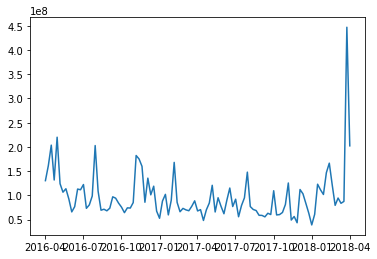

In [50]:
plt.plot(df_7day_volume_clean['Date'],df_7day_volume_clean['Volume'])

In [96]:
df_by_volume_10week =  df_fb_tq_2year.groupby(pd.cut(df_fb_tq_2year.index, bins=bin_length_ten, 
        precision=0))["Volume"].sum()

In [98]:
df_by_volume_10week = pd.DataFrame(df_by_volume_10week)

In [100]:
df_by_volume_10week = df_by_volume_10week.reset_index(drop=True)
df_by_volume_10week['Volume'] = df_by_volume_10week['Volume'] / bin_length_ten

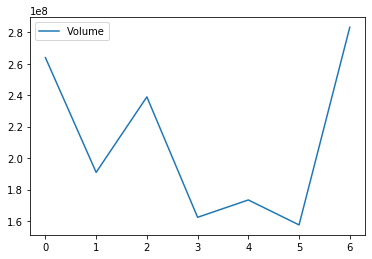

In [108]:
##VWAP

In [125]:
#simple moving average
df_7day_volume_clean['SMA']


,Volume,Date
Date,,
2016-04-03,130380305.0,2016-04-03
2016-04-10,161477263.0,2016-04-10
2016-04-17,203633903.0,2016-04-17
2016-04-24,131738986.0,2016-04-24
2016-05-01,220003210.0,2016-05-01
...,...,...
2018-03-04,94503755.0,2018-03-04
2018-03-11,83662089.0,2018-03-11
2018-03-18,87595042.0,2018-03-18


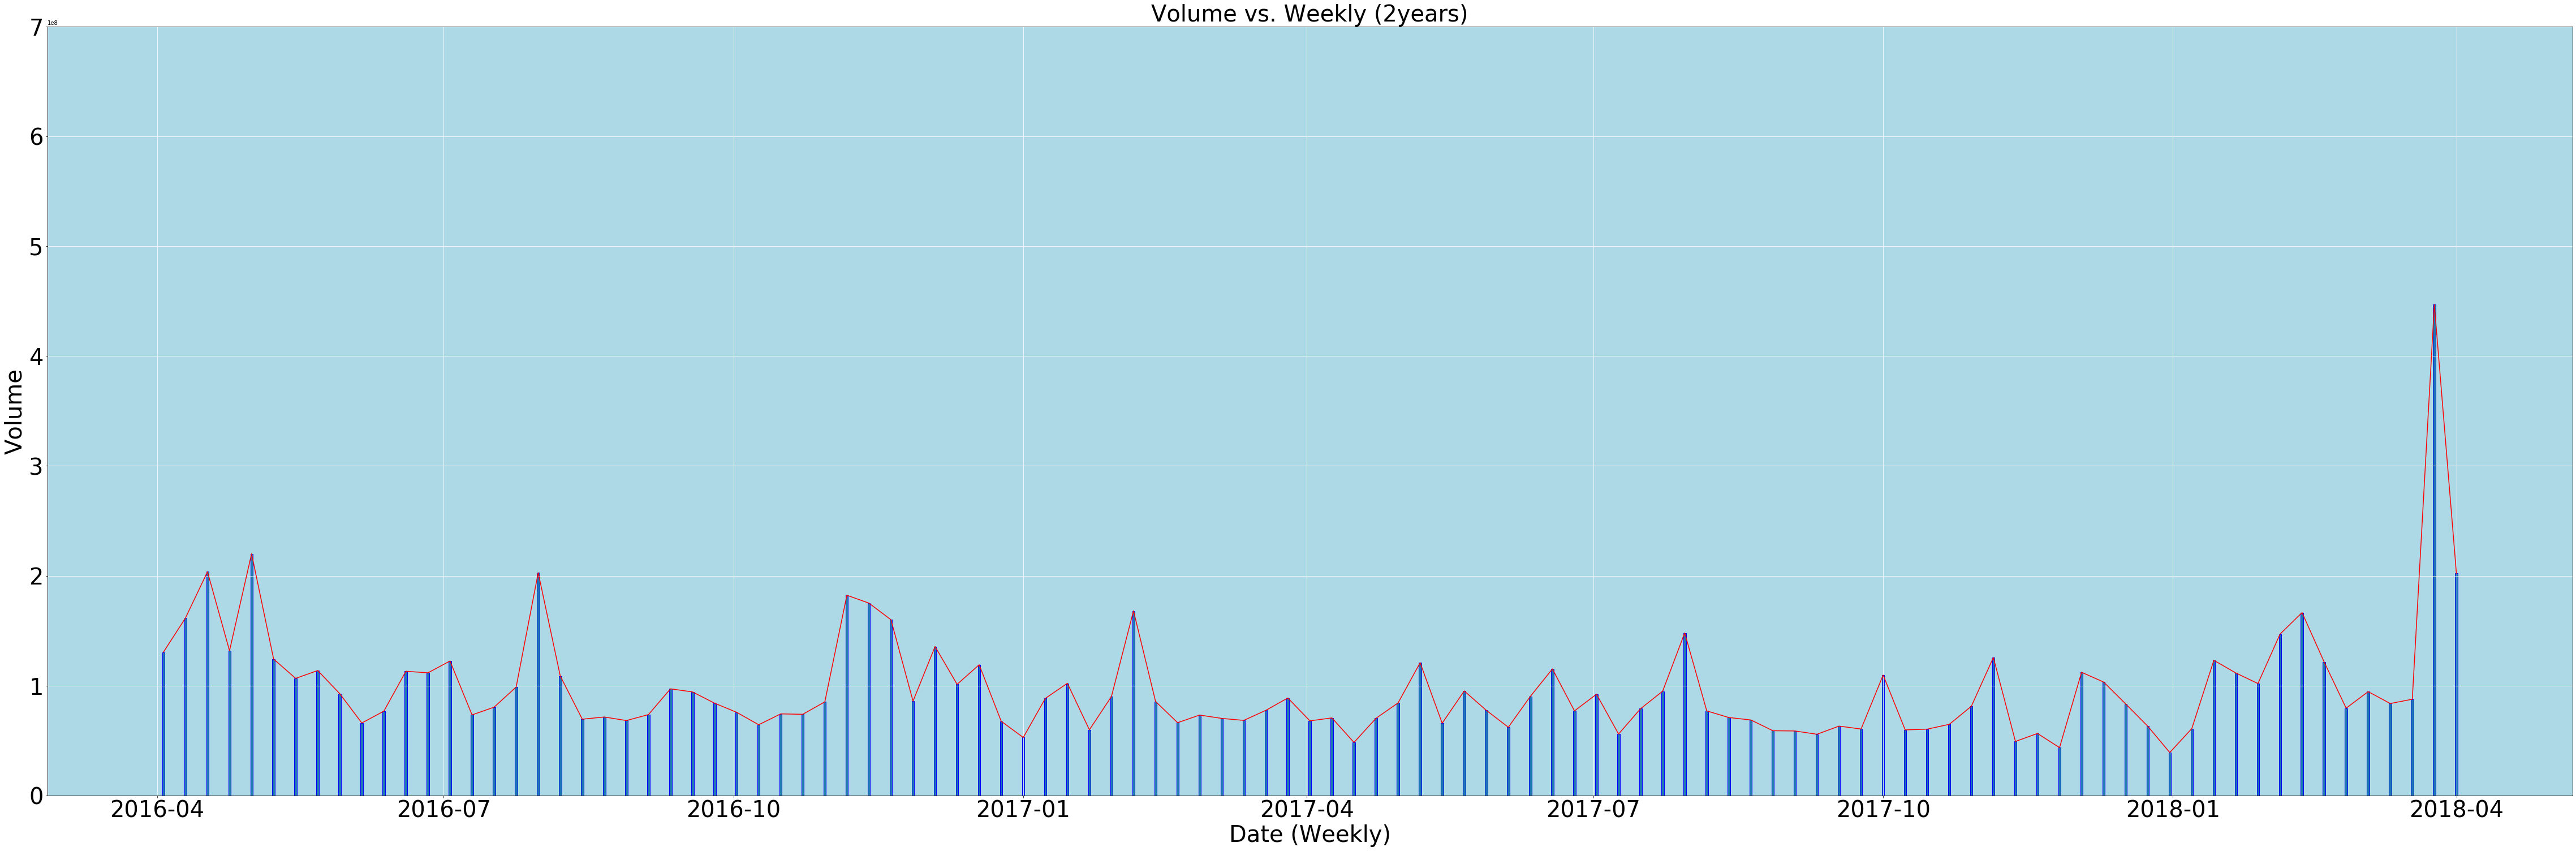

In [124]:
x_axis = df_7day_volume_clean['Date']
y_axis = df_7day_volume_clean['Volume']

figure, ax = plt.subplots()
ax.bar(x_axis,y_axis,edgecolor='b')
ax.plot(x_axis,y_axis,c='red')
ax.grid(color='white')
ax.set_ylim(0,700000000)
ax.set_title(f'Volume vs. Weekly (2years)',size = 40)
ax.set_xlabel('Date (Weekly)',fontsize = 40)
ax.set_ylabel('Volume',fontsize = 40)
ax.set_facecolor('lightblue')
figure.set_figheight(25)
figure.set_figwidth(80)
ax.tick_params(axis='both', labelsize=40)
#plt.savefig(os.path.join(f'City Latitude vs Max Temperature.png'))
plt.show()

In [85]:
#7 days x 10 weeks 
#7 days x 40 weeks = 280
bin_length_10week = len(df_fb_tq_2year.index) / 70
bin_length_40week = len(df_fb_tq_2year.index) / 280

In [86]:
bin_length_ten = np.round(bin_length_10week)
bin_length_forty = np.round(bin_length_40week)

In [87]:
df_by_close_10week =  df_fb_tq_2year.groupby(pd.cut(df_fb_tq_2year.index, bins=bin_length_ten, 
        precision=0))["Adj. Close"].sum()
df_by_close_40week =  df_fb_tq_2year.groupby(pd.cut(df_fb_tq_2year.index, bins=bin_length_forty, 
        precision=0))["Adj. Close"].sum()

In [88]:
df_by_close_10week = pd.DataFrame(df_by_close_10week)
df_by_close_40week = pd.DataFrame(df_by_close_40week)

In [89]:
df_by_close_10week = df_by_close_10week.reset_index(drop=True)
df_by_close_40week = df_by_close_40week.reset_index(drop=True)

In [90]:
df_by_close_10week['Adj. Close'] = df_by_close_10week['Adj. Close'] / 70
df_by_close_40week['Adj. Close'] = df_by_close_40week['Adj. Close'] / 280

In [91]:
df_10week_avg = df_by_close_10week
df_40week_avg = df_by_close_40week

In [92]:
df_10week_avg

,Adj. Close
0,120.158857
1,132.889429
2,124.760571
3,145.332429
4,163.963286
5,177.158857
6,182.553284


In [93]:
df_40week_avg

,Adj. Close
0,111.542393
1,150.161785


# Will need to split data into the following tables to graph them.
Volumne and Date.
Open and Date
High and Date
Open minus Close


In [ ]:
df_fb_tq

In [ ]:
style.use('ggplot')

In [ ]:
start = dt.datetime(2000,1,1)
end = dt.datetime(2016,12,31)

In [ ]:
dates = []
prices = []

In [ ]:
def get_data(filename):
    with open(filename, 'r') as csvfile:
        csvFileReader = csv.reader(csvfile)
        next(csvFileReader)
        for row in csvFileReader:
            dates.append(int(row[0].split('-')[0]))
            prices.append(float(row[1]))
    return

In [ ]:
def predict_prices(dates,prices,x):
    